Text(0, 0.5, '$x_1$')

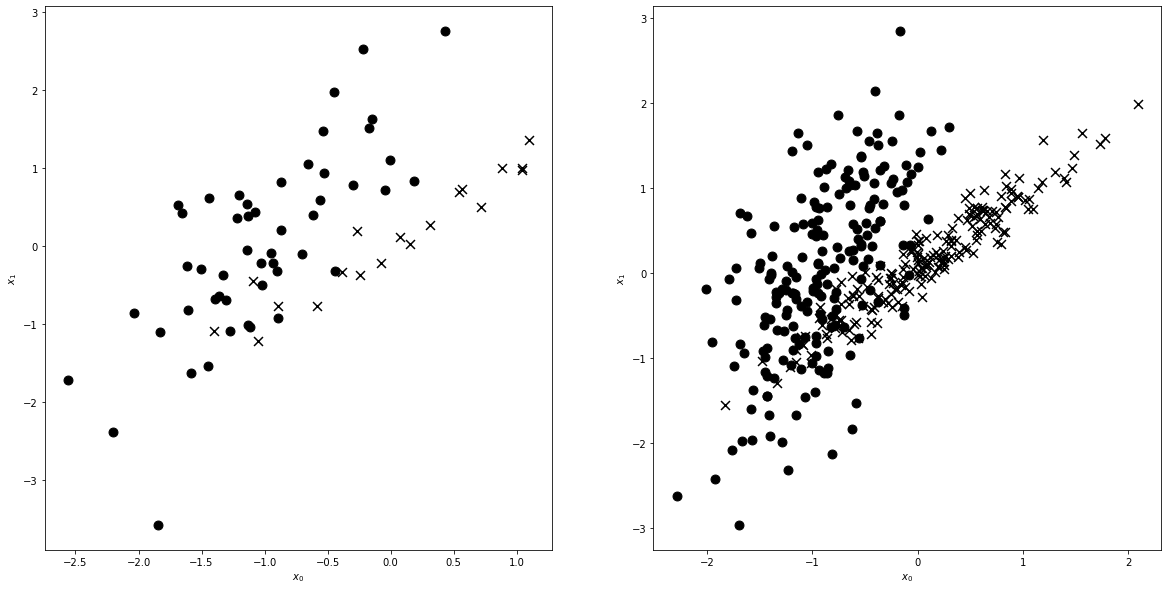

In [1]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt
from sklearn import linear_model

# Generate training data
N1 = 50
N2 = 20

C1 = [[0.5, 0.25], [0.25, 1]]
C2 = [[0.6, 0.4], [0.4, 0.5]]

M1 = np.matlib.repmat( np.array([[-1], [0]]), 1, N1 )
M2 = np.matlib.repmat( np.array([[0], [0.1]]), 1, N2 )

X1 = np.random.randn(2,N1)
X2 = np.random.randn(2,N2)

X = np.concatenate( (np.dot(C1, X1) + M1,  np.dot(C2, X2) + M2), axis=1)

Y = np.zeros((N1+N2))
Y[0:N1] = +1
Y[N1+1:None] = -1

# generate test data 
N1_test = 200
N2_test = 200

X1_test = np.random.randn(2,N1_test)
X2_test = np.random.randn(2,N2_test)

M1_test = np.matlib.repmat( np.array([[-1], [0]]), 1, N1_test )
M2_test = np.matlib.repmat( np.array([[0], [0.1]]), 1, N2_test )

X_test = np.concatenate( (np.dot(C1, X1_test) + M1_test,  np.dot(C2, X2_test) + M2_test), axis=1)

Y_test = np.zeros((N1_test+N2_test))
Y_test[0:N1_test] = +1
Y_test[N1_test+1:None] = -1

# plot training and test sets next to each other 
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax[0].scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax[0].set_xlabel('$x_0$')
ax[0].set_ylabel('$x_1$')


ax[1].scatter(X_test[0,0:N1_test], X_test[1,0:N1_test], s= 80, marker='o', c='k')
ax[1].scatter(X_test[0,N1_test+1:None], X_test[1,N1_test+1:None], s=80, marker='x', c='k')
ax[1].set_xlabel('$x_0$')
ax[1].set_ylabel('$x_1$')

In [2]:
# first generate the features

# fix random see 

np.random.seed(1)

J = 600

#ww = np.transpose(np.matlib.repmat( 1.0/(1+ np.arange(J)), 4,1 ))

ww = np.random.rand(J, 4)*10

w = ww*np.random.randn(J, 4) # each row corresponds to a feature map



def psi(w,x):

  # uncomment to try other random features or implement your own

  val = np.cos( w[0]*x[0] + w[1]*x[1] ) + np.sin(w[2]*x[0] + w[3]*x[1])

  return val


def f_rndf(x1, x2, b):

  val = b[0]
  for j in range(1,J+1):
    
    val += b[j]*psi(w[j-1,:], [x1, x2])

  return val

#A_rndf = np.ones((N1+N2, J+1))
#for j in range(1,J+1):
#  for n in range(N1+N2):
#    A_rndf[n, j] = psi( w[j-1,:], X[:,n])

A_rndf = np.ones((N1+N2, J))
for j in range(0,J):
  for n in range(N1+N2):
    A_rndf[n, j] = psi( w[j,:], X[:,n])

In [3]:
# fit model for different values of alpha (our lambda) and plot the MSE 

M_lambd = 50

l = np.linspace(-15, 30, M_lambd)
MSE_test = np.zeros((M_lambd))
MSE_train = np.zeros((M_lambd))

beta_rndf = np.zeros((M_lambd, J+1))


for j in range(M_lambd):

  reg_rndf = linear_model.Ridge(alpha=2**l[j]) # alpha is our lambda
  reg_rndf.fit(A_rndf, Y)
  beta_rndf[j,:] = np.insert(reg_rndf.coef_, 0, reg_rndf.intercept_)


  MSE_train[j]= 1/(N1+ N2)*np.linalg.norm( (f_rndf(X[0,:], X[1,:], beta_rndf[j,:])) - Y )**2
  MSE_test[j] = 1/(N1_test+ N2_test)*np.linalg.norm( (f_rndf(X_test[0,:], X_test[1,:], beta_rndf[j,:])) - Y_test )**2

train_min_indx= np.argmin(MSE_train)
test_min_indx= np.argmin(MSE_test)

print(train_min_indx)
print(test_min_indx)

0
25


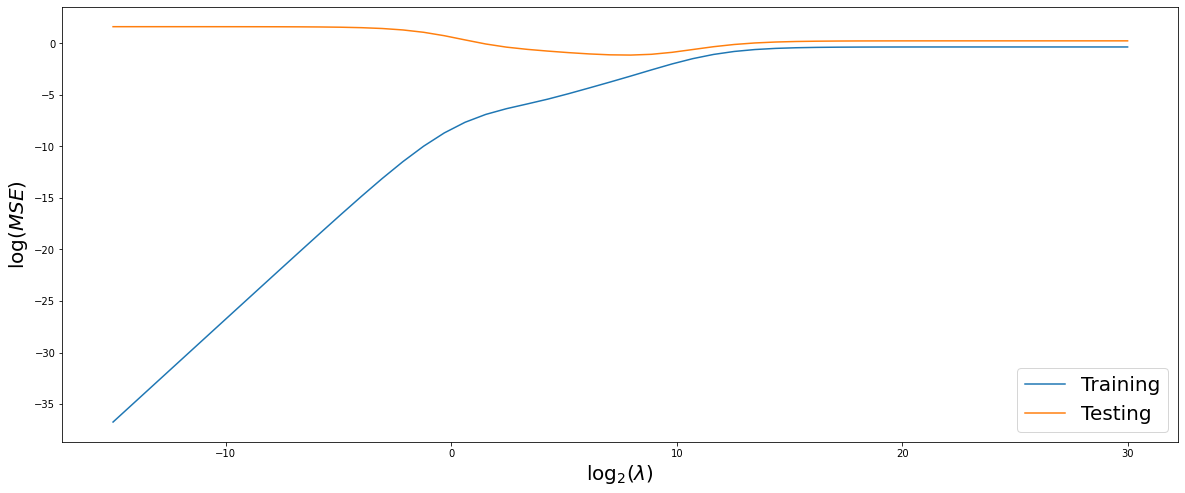

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20,8))

ax.plot((l), np.log2(MSE_train), label='Training')
ax.plot((l), np.log2(MSE_test), label='Testing')
ax.set_xlabel('$\log_2(\lambda)$', fontsize=20)
ax.set_ylabel('$\log(MSE)$', fontsize=20)
plt.legend(fontsize=20)
plt.show()

Note the training error decreases with lambda while the  testing error decreases first and then increases with smaller values of lambda. 

Text(0.5, 1.0, 'Lambda= 2**30.0')

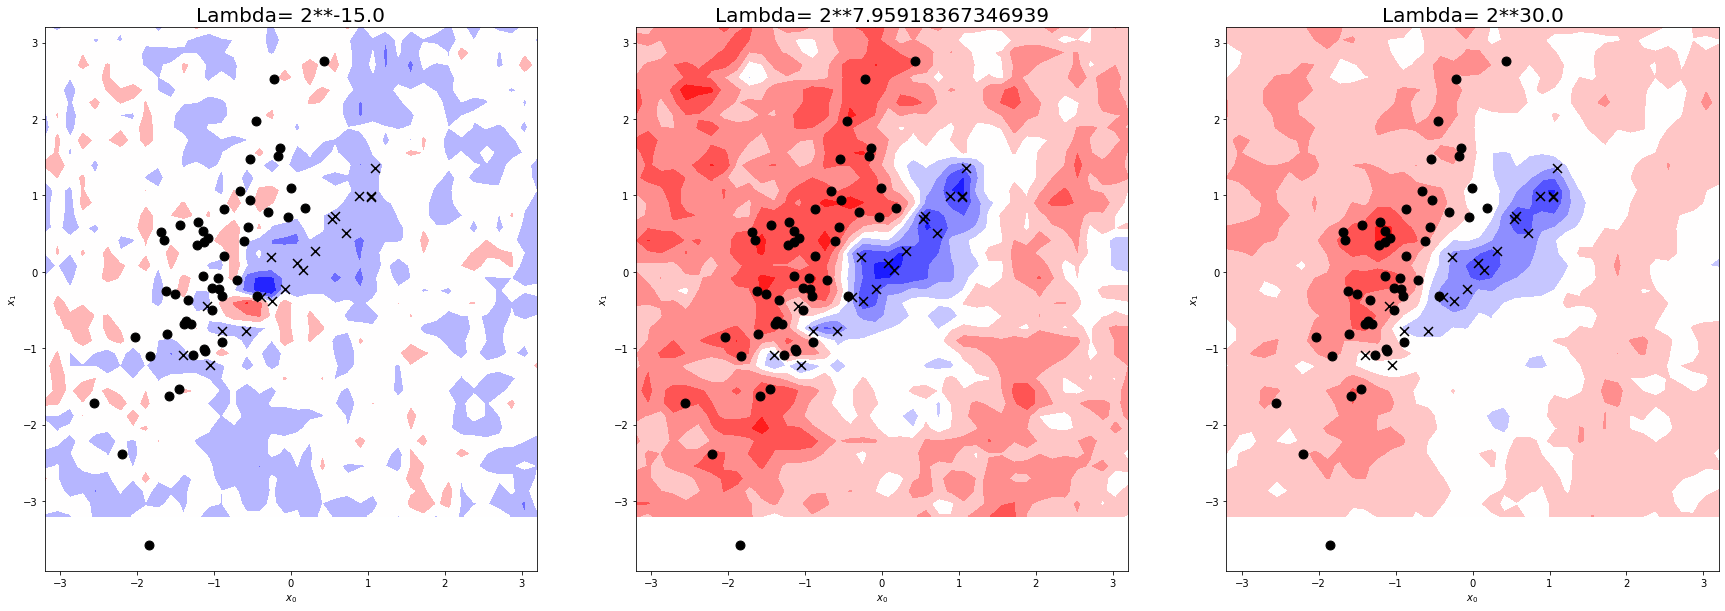

In [5]:

# plot the classifier for small, optimal and large values of lambda

x = np.linspace(-3.2, 3.2, 40)

y =x 

xv, yv = np.meshgrid( x, x )

fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].contourf(xv, yv, (f_rndf(xv, yv, beta_rndf[train_min_indx,:])), cmap='bwr')
ax[0].scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax[0].scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax[0].set_xlabel('$x_0$')
ax[0].set_ylabel('$x_1$')
ax[0].set_title('Lambda= 2**'+str(l[train_min_indx]), fontsize=20)

ax[1].contourf(xv, yv, (f_rndf(xv, yv, beta_rndf[test_min_indx,:])), cmap='bwr')
ax[1].scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax[1].scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax[1].set_xlabel('$x_0$')
ax[1].set_ylabel('$x_1$')
ax[1].set_title('Lambda= 2**'+str(l[test_min_indx]), fontsize=20)

ax[2].contourf(xv, yv, (f_rndf(xv, yv, beta_rndf[M_lambd-1,:])), cmap='bwr')
ax[2].scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax[2].scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax[2].set_xlabel('$x_0$')
ax[2].set_ylabel('$x_1$')
ax[2].set_title('Lambda= 2**'+str(l[M_lambd-1]), fontsize=20)


In [6]:
# Ridge regression with CV 

lambda_vals = 2**l

reg_rndf_CV = linear_model.RidgeCV(alphas=lambda_vals)
reg_rndf_CV.fit(A_rndf, Y)
beta_CV = np.insert(reg_rndf_CV.coef_, 0, reg_rndf_CV.intercept_)

print("Log_2(Lambda_ast): " + str(np.log2(reg_rndf_CV.alpha_)))

Log_2(Lambda_ast): 7.95918367346939


Text(0.5, 1.0, 'CV fit')

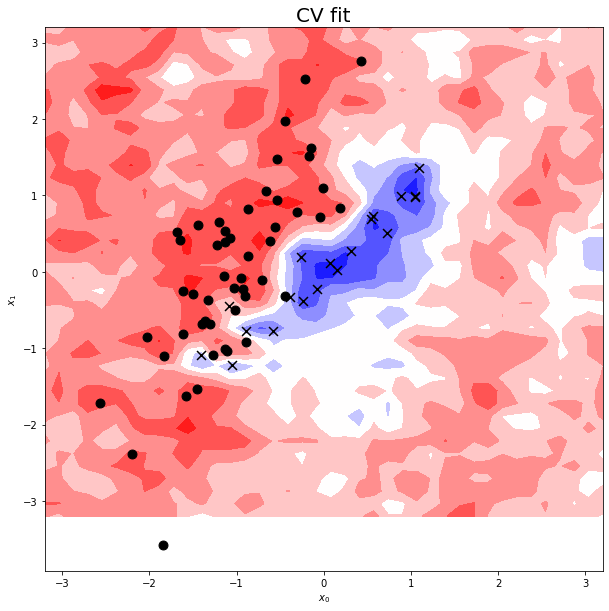

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.contourf(xv, yv, f_rndf(xv, yv, beta_CV), cmap='bwr')
ax.scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax.scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('CV fit', fontsize=20)

Text(0.5, 1.0, 'K= 20')

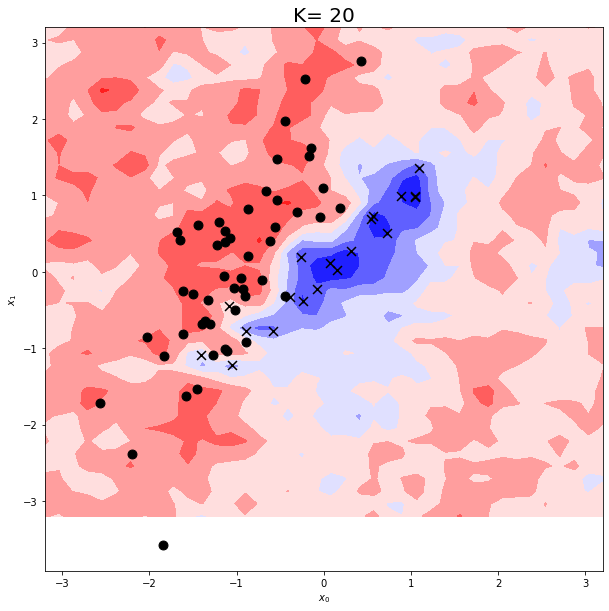

In [13]:
# For playing around with choice of K in CV

lambda_vals = 2**l

K = 20

reg_rndf_CV = linear_model.RidgeCV(alphas=lambda_vals, cv= K)
reg_rndf_CV.fit(A_rndf, Y)
beta_CV = np.insert(reg_rndf_CV.coef_, 0, reg_rndf_CV.intercept_)

fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.contourf(xv, yv, f_rndf(xv, yv, beta_CV), cmap='bwr')
ax.scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax.scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('K= '+str(K), fontsize=20)